# Região Centro Oeste PA Janeiro de 2023

### Introduction
The provided visual and statistical information offers an insightful snapshot of the demographic distribution for the diagnosis of 'N180' within the Centro-Oeste region of Brazil. The pie chart illustrates a comparative representation of the prevalence of 'N180' across four significant areas: Distrito Federal, Goiás, Mato Grosso do Sul, and Mato Grosso. This regional analysis is complemented by a set of weighted average ages for each state, providing a demographic perspective on the age groups most affected by this condition.

### Reading the files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

### Merging the data of PA_CIDPRI in one dataset with the 4 states

In [2]:
# Connect to a SQLite database
conn = sqlite3.connect('example.db')

# Function to load CSV and create SQL table
def load_data(csv_path, table_name, encoding=None):
    try:
        df = pd.read_csv(csv_path, encoding=encoding)
        print(f"Data loaded successfully for {table_name}: {df.head()}")
        df.to_sql(table_name, conn, if_exists='replace', index=False)
        print(f"Table '{table_name}' created successfully.")
    except Exception as e:
        print(f"Error loading data for {table_name}: {e}")

# Load data into the database
load_data('csv/PAGO2301.csv', 'go')
load_data('csv/PADF2301.csv', 'df')
load_data('csv/PAMS2301.csv', 'ms', encoding='ISO-8859-1')
load_data('csv/PAMT2301.csv', 'mt', encoding='ISO-8859-1')

# Verify the tables were created
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

# Close the connection
conn.close()

C:\Users\digui\AppData\Local\Temp\ipykernel_20736\777988785.py:7: DtypeWarning: Columns (20,22,29,30,31,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding=encoding)


Data loaded successfully for go:    PA_CODUNI  PA_GESTAO PA_CONDIC  ...  PA_SRV_C  PA_INE  PA_NAT_JUR
0    2442620     520510        PG  ...       NaN     NaN        2062
1    2442620     520510        PG  ...       NaN     NaN        2062
2    2442620     520510        PG  ...       NaN     NaN        2062
3    2442620     520510        PG  ...       NaN     NaN        2062
4    2442620     520510        PG  ...       NaN     NaN        2062

[5 rows x 60 columns]
Table 'go' created successfully.


C:\Users\digui\AppData\Local\Temp\ipykernel_20736\777988785.py:7: DtypeWarning: Columns (20,22,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding=encoding)


Data loaded successfully for df:    PA_CODUNI  PA_GESTAO PA_CONDIC  ...  PA_SRV_C  PA_INE  PA_NAT_JUR
0      10456     530000        EP  ...       NaN     NaN        3077
1      10456     530000        EP  ...       NaN     NaN        3077
2      10456     530000        EP  ...       NaN     NaN        3077
3      10456     530000        EP  ...       NaN     NaN        3077
4      10456     530000        EP  ...       NaN     NaN        3077

[5 rows x 60 columns]
Table 'df' created successfully.


C:\Users\digui\AppData\Local\Temp\ipykernel_20736\777988785.py:7: DtypeWarning: Columns (22,30,31,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding=encoding)


Data loaded successfully for ms:    PA_CODUNI  PA_GESTAO PA_CONDIC  ...  PA_SRV_C  PA_INE  PA_NAT_JUR
0       9989     500270        PG  ...       NaN     NaN        2062
1       9989     500270        PG  ...       NaN     NaN        2062
2       9989     500270        PG  ...       NaN     NaN        2062
3       9989     500270        PG  ...       NaN     NaN        2062
4       9989     500270        PG  ...       NaN     NaN        2062

[5 rows x 60 columns]
Table 'ms' created successfully.


C:\Users\digui\AppData\Local\Temp\ipykernel_20736\777988785.py:7: DtypeWarning: Columns (22,30,31,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding=encoding)


Data loaded successfully for mt:    PA_CODUNI  PA_GESTAO PA_CONDIC  ...  PA_SRV_C  PA_INE  PA_NAT_JUR
0    2396580     510760        PG  ...       NaN     NaN        1244
1    2396580     510760        PG  ...       NaN     NaN        1244
2    2396580     510760        PG  ...       NaN     NaN        1244
3    2396580     510760        PG  ...       NaN     NaN        1244
4    2396580     510760        PG  ...       NaN     NaN        1244

[5 rows x 60 columns]
Table 'mt' created successfully.
Tables in the database: [('go',), ('df',), ('ms',), ('mt',)]


In [3]:
# Connect to a SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Perform SQL queries to process the data
query = """
SELECT PA_CIDPRI,
       SUM(CASE WHEN region = 'GO' THEN freq ELSE 0 END) AS Goias,
       SUM(CASE WHEN region = 'MS' THEN freq ELSE 0 END) AS Mato_Grosso_do_Sul,
       SUM(CASE WHEN region = 'MT' THEN freq ELSE 0 END) AS Mato_Grosso,
       SUM(CASE WHEN region = 'DF' THEN freq ELSE 0 END) AS Distrito_Federal,
       SUM(freq) AS Total_Frequency
FROM (
    SELECT PA_CIDPRI, COUNT(*) AS freq, 'GO' AS region FROM go GROUP BY PA_CIDPRI
    UNION ALL
    SELECT PA_CIDPRI, COUNT(*), 'MS' FROM ms GROUP BY PA_CIDPRI
    UNION ALL
    SELECT PA_CIDPRI, COUNT(*), 'MT' FROM mt GROUP BY PA_CIDPRI
    UNION ALL
    SELECT PA_CIDPRI, COUNT(*), 'DF' FROM df GROUP BY PA_CIDPRI
)
GROUP BY PA_CIDPRI
ORDER BY Total_Frequency DESC
LIMIT 5;
"""

# Execute the query and fetch the results
df_region_centro_oeste = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [4]:
# Display the top 5 rows
df_region_centro_oeste.head()

,PA_CIDPRI,Goias,Mato_Grosso_do_Sul,Mato_Grosso,Distrito_Federal,Total_Frequency
0,0000,662371,427091,769298,280727,2139487
1,Z000,30781,8391,26618,1501,67291
2,Z008,1527,30491,1342,164,33524
3,N180,6754,4060,10353,3245,24412
4,0,16384,0,0,0,16384


### Frequency of the first 5 rows excluding the 0000

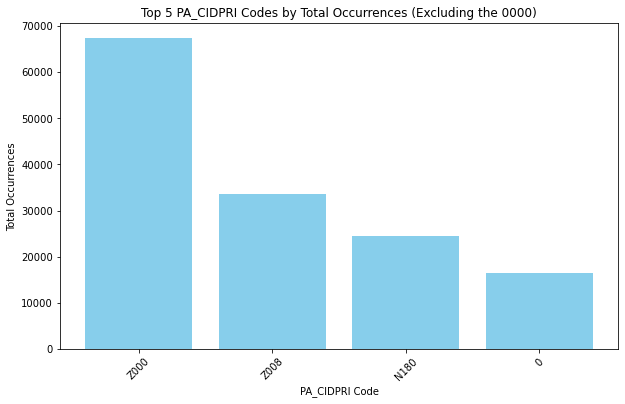

In [7]:
# Ensure PA_CIDPRI is of type string
df_region_centro_oeste['PA_CIDPRI'] = df_region_centro_oeste['PA_CIDPRI'].astype(str)

# Exclude the first row and then retrieve the top 5 rows
top5_excluding_first = df_region_centro_oeste.iloc[1:6]

# Now plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top5_excluding_first['PA_CIDPRI'], top5_excluding_first['Total_Frequency'], color='skyblue')
plt.title('Top 5 PA_CIDPRI Codes by Total Occurrences (Excluding the 0000)')
plt.xlabel('PA_CIDPRI Code')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45)
plt.show()

### Pie Chart of the N180

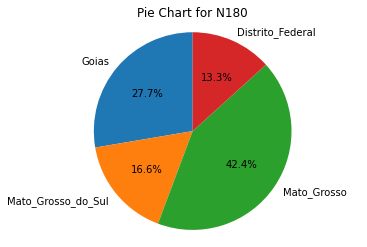

In [9]:
from matplotlib import pyplot as plt

# Filter out the 'N180' row
df_n180_row = df_region_centro_oeste[df_region_centro_oeste['PA_CIDPRI'] == 'N180']

# Drop 'PA_CIDPRI' and 'Total Frequency' columns
df_n180_data = df_n180_row.drop(columns=['PA_CIDPRI', 'Total_Frequency'])

# Now we can plot the pie chart
fig, ax = plt.subplots()
ax.pie(df_n180_data.iloc[0], labels=df_n180_data.columns, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Set the title of the pie chart
plt.title('Pie Chart for N180')

# Display the pie chart
plt.show()

In [11]:
# Connect to a SQLite database
conn = sqlite3.connect('example.db')

# SQL query to filter by 'N180' in 'PA_CIDPRI' and count 'PA_IDADE'
def age_frequency_query(table_name, region_code):
    query = f"""
    SELECT PA_IDADE, COUNT(PA_IDADE) AS '{region_code}'
    FROM {table_name}
    WHERE PA_CIDPRI = 'N180'
    GROUP BY PA_IDADE
    """
    return query

# Perform SQL queries for each region
df_freq = pd.read_sql_query(age_frequency_query('df', 'DF'), conn)
go_freq = pd.read_sql_query(age_frequency_query('go', 'GO'), conn)
ms_freq = pd.read_sql_query(age_frequency_query('ms', 'MS'), conn)
mt_freq = pd.read_sql_query(age_frequency_query('mt', 'MT'), conn)

# Merge the frequencies into a single DataFrame
freq_merged = df_freq.merge(go_freq, on='PA_IDADE', how='outer') \
                     .merge(ms_freq, on='PA_IDADE', how='outer') \
                     .merge(mt_freq, on='PA_IDADE', how='outer')

# Fill NaN values with 0 to indicate no occurrences for that age in a specific dataset
freq_merged = freq_merged.fillna(0).astype(int)

# Renaming the 'PA_IDADE' column to 'Age'
freq_merged.rename(columns={'PA_IDADE': 'Age'}, inplace=True)

# Close the connection
conn.close()

In [12]:
freq_merged.head()

,Age,DF,GO,MS,MT
0,0,3,3,0,0
1,3,8,2,0,0
2,4,4,1,3,4
3,5,2,3,2,0
4,6,2,1,0,0


### Calculating weighted average age for each state for the N180

In [13]:
# Connect to a SQLite database
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# SQL query to calculate weighted average age for 'N180' in 'PA_CIDPRI'
def weighted_average_age_query(table_name, region_code):
    query = f"""
    SELECT SUM(PA_IDADE * freq) * 1.0 / SUM(freq) AS '{region_code}_average'
    FROM (
        SELECT PA_IDADE, COUNT(*) AS freq
        FROM {table_name}
        WHERE PA_CIDPRI = 'N180'
        GROUP BY PA_IDADE
    )
    """
    return query

# Execute queries for each region and fetch results
cursor.execute(weighted_average_age_query('df', 'DF'))
df_average = cursor.fetchone()[0]

cursor.execute(weighted_average_age_query('go', 'GO'))
go_average = cursor.fetchone()[0]

cursor.execute(weighted_average_age_query('ms', 'MS'))
ms_average = cursor.fetchone()[0]

cursor.execute(weighted_average_age_query('mt', 'MT'))
mt_average = cursor.fetchone()[0]

# Close the connection
conn.close()

# Consolidating the averages into a dictionary for easier use
state_averages = {
    'DF': df_average,
    'GO': go_average,
    'MS': ms_average,
    'MT': mt_average
}

# Printing the results
print("Weighted Averages of Age for each state with diagnosis 'N180':")
for state, average in state_averages.items():
    print(f"{state}: {average:.2f}")

Weighted Averages of Age for each state with diagnosis 'N180':
DF: 54.18
GO: 55.12
MS: 55.76
MT: 55.78


### Plotting the bar chart of weighted average ages for the N180

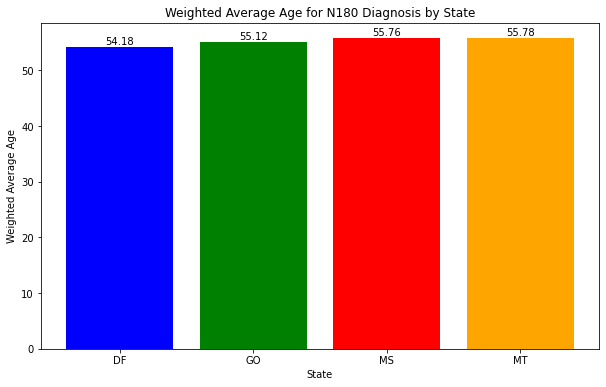

In [14]:
states = list(state_averages.keys())
averages = list(state_averages.values())

plt.figure(figsize=(10, 6))
plt.bar(states, averages, color=['blue', 'green', 'red', 'orange'])

plt.title('Weighted Average Age for N180 Diagnosis by State')
plt.xlabel('State')
plt.ylabel('Weighted Average Age')
plt.xticks(states)

for i, avg in enumerate(averages):
    plt.text(i, avg + 0.5, f"{avg:.2f}", ha = 'center')

plt.show()

### Analysis
From the pie chart, we can discern that Mato Grosso bears the largest share of 'N180' diagnoses at 42.4%, followed by Goiás with 27.7%, Mato Grosso do Sul with 16.6%, and finally, the Distrito Federal at 13.3%. This distribution suggests a higher concentration of reported cases in Mato Grosso. The weighted average ages from the dataset provide further context: the average age of diagnosis is fairly consistent across the states, hovering in the mid-50s, with Mato Grosso do Sul and Mato Grosso presenting marginally higher averages.

### Conclusion
The prevalence and demographic data regarding the 'N180' diagnosis within the Centro-Oeste region indicate a noteworthy regional variance, with Mato Grosso at the forefront of reported cases. However, the age data presents a different narrative of consistency, demonstrating that the mid-50s age group is similarly affected across different states. These insights underscore the importance of regional health data in understanding and addressing health issues and may inform public health policies and resource allocation to better serve the affected populations. The data indicates that while the distribution of the condition varies by region, the age of those affected does not show significant variation, pointing towards the potential influence of non-age-related factors in the regional distribution of the diagnosis.